In [1]:
from ramCOH import functions as f
import ramCOH.processing as ram
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout()

In [2]:
ol_file = r".\olivine\PI097-02_2021_11_19_11_00_28_532nm_Edge_100%_x100_VIS_LWD_H50_1800 (450-850nm)_10s x 2_01.txt"
x, y = np.genfromtxt(ol_file, unpack=True)

In [4]:
sort = np.argsort(x)
xbir, ybir = f._extractBIR(x[sort], y[sort], ram.olivine.birs)
noise, spline = f._calculate_noise(xbir, ybir, 1)
noise

2.637451424345487

In [5]:
olivine = ram.olivine(x, y)
olivine.baselineCorrect(olivine.birs, smooth_factor=1)

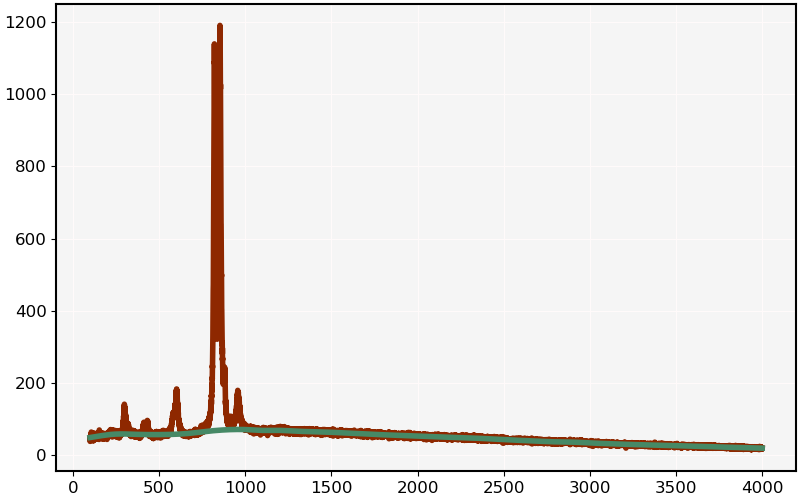

In [6]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.plot(olivine.x, olivine.baseline)

plt.show()

In [12]:
olivine.deconvolve(noise_threshold=1.2, peak_prominence=4)

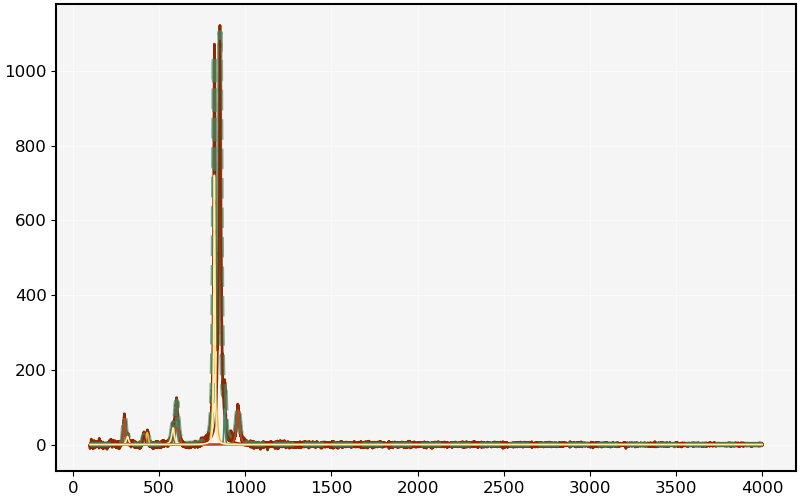

In [13]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(olivine.x, olivine.intensities["BC"], linewidth=2)
plt.plot(olivine.x, f.sum_GaussLorentz(olivine.x, *olivine.deconvolution_parameters), alpha=0.7, linestyle="dashed")
# plt.plot(x, spline)
for curve in olivine.peaks:
    plt.plot(olivine.x, f.GaussLorentz(olivine.x, **curve), linewidth=1.2)
# plt.plot(xtrim, f.sum_GaussLorentz(xtrim, *params), linewidth=1)

In [ ]:
_, centers, widths = f._find_peak_parameters(
    x=olivine.x, y=olivine.intensities["BC"], prominence=3
        )

ranges = f._get_peakFit_ranges(
    centers=centers, half_widths=widths, fit_window=4
)

print(ranges)
print(centers, widths)

xtrim, ytrim = f._trimxy_ranges(olivine.x, olivine.intensities["BC"], ranges[0])
noise, spline = f._calculate_noise(olivine.x, olivine.intensities["BC"])
params, r2, _ = f.deconvolve_signal(xtrim, ytrim, prominence=2, noise_threshold=1, baseline0=True)
r2